In [36]:
from PIL import Image, ImageOps, ImageDraw, ImageFont
import os.path, sys
import matplotlib.pyplot as plt



max_rows = 2
rotation_max_cols = 5
filter_max_cols = 6

In [2]:
x_labels = ['-30°', '-15°', '0°', '15°', '30°']
images = [
    {
        'name': 'harebell_flower, EfficientNetB0 100%, Gradcam',
        'title': 'harebell',
        'path': './aug_crop1/rotation/harabell_efficientnet',
        'scores': [0.9922, 0.9959, 0.9982, 0.9970, 0.9972]
    },
    {
        'name': 'poutine_densenet, DenseNet 100%, Gradcam',
        'title': 'poutine',
        'path': './aug_crop1/rotation/poutine_densenet',
        'scores': [0.9982, 0.9961, 0.9959, 0.9971, 0.9984]
    },
    {
        'name': 'rose_resnet, Resnet 60%, Gradcam',
        'title': 'red_rose',
        'path': './aug_crop1/rotation/rose_resnet',
        'scores': [0.9928, 0.9930, 0.9665, 0.9613, 0.9578]
    }
]

In [76]:
path = "./aug_crop1/rotation"
image_pos = (14, 103, 14 + 368, 103 + 367)
attr_pos = (407, 103, 407 + 368, 103 + 367)
desc_pos = (74, 10, 74 + 657, 10 + 45)
range_pos = (396, 477, 396 + 390, 477 + 44)
all_images = []

def crop(img_pos, att_pos, base_dir):
    croppedImgs = []
    croppedAttrs = []
    croppedDesc = []
    croppedRanges = []
    names = []
    for item in dirs:
        fullpath = os.path.join(base_dir,item)        
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            croppedImgs.append(im.crop(img_pos))
            croppedAttrs.append(im.crop(attr_pos))
            croppedDesc.append(im.crop(desc_pos))
            croppedRanges.append(im.crop(range_pos))
            names.append(fullpath)
            
    return croppedImgs, croppedAttrs, croppedDesc, croppedRanges, names


for img_def in images:
    dirs = os.listdir(img_def['path'])
    dirs.sort()
    imgs, attrs, descs, ranges, names = crop(image_pos, attr_pos, img_def['path'])
    all_images = all_images + list(zip(imgs, attrs, descs, ranges, names))
    
    

In [77]:
vert_images = []
font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeSansBold.ttf", 16)
for image in all_images:
    title_w, title_h = image[2].size
    bg_width = max(400, title_w)
    background = Image.new("RGB", (bg_width, 927), (255, 255, 255))
    bg_w, bg_h = background.size
    title_offset = ((bg_w - title_w) // 2, 19)
    image_offset = (bg_w - image[0].size[0]) // 2
    background.paste(image[0], (image_offset, 102))
    background.paste(image[1], (image_offset, 496))
    background.paste(image[2], title_offset)
    background.paste(image[3], (image_offset - 10, 872))
    
    invrtd = ImageOps.invert(background)
    cropBox = ImageOps.invert(background).getbbox()
    left_border = cropBox[0] - 10
    right_border = cropBox[2] + 10
    
    
    ImageDraw.Draw(
        background  # Image
    ).text(
        (284, 477),  # Coordinates
        'saliency_map',  # Text
        (0, 0, 0),  # Color
        font=font
    )
    ImageDraw.Draw(
        background  # Image
    ).text(
        (314, 82),  # Coordinates
        'input',  # Text
        (0, 0, 0),  # Color
        font=font
    )
    vert_images.append((background.crop((left_border, 0, right_border, 927)), image[4]))
    

In [78]:
vert_images[0]

(<PIL.Image.Image image mode=RGB size=501x927 at 0x7FF3C8219DF0>,
 './aug_crop1/rotation/harabell_efficientnet/--30.png')

In [79]:
vert_images[1][0].show() 

In [84]:
for image in vert_images:
    print(image[1][:-4]+'_vert.jpg')
    image[0].save(image[1][:-4]+'_vert.jpg', "JPEG")

./aug_crop1/rotation/harabell_efficientnet/--30_vert.jpg
./aug_crop1/rotation/harabell_efficientnet/-15_vert.jpg
./aug_crop1/rotation/harabell_efficientnet/0_vert.jpg
./aug_crop1/rotation/harabell_efficientnet/15_vert.jpg
./aug_crop1/rotation/harabell_efficientnet/30_vert.jpg
./aug_crop1/rotation/poutine_densenet/--30_vert.jpg
./aug_crop1/rotation/poutine_densenet/-15_vert.jpg
./aug_crop1/rotation/poutine_densenet/0_vert.jpg
./aug_crop1/rotation/poutine_densenet/15_vert.jpg
./aug_crop1/rotation/poutine_densenet/30_vert.jpg
./aug_crop1/rotation/rose_resnet/--30_vert.jpg
./aug_crop1/rotation/rose_resnet/-15_vert.jpg
./aug_crop1/rotation/rose_resnet/0_vert.jpg
./aug_crop1/rotation/rose_resnet/15_vert.jpg
./aug_crop1/rotation/rose_resnet/30_vert.jpg


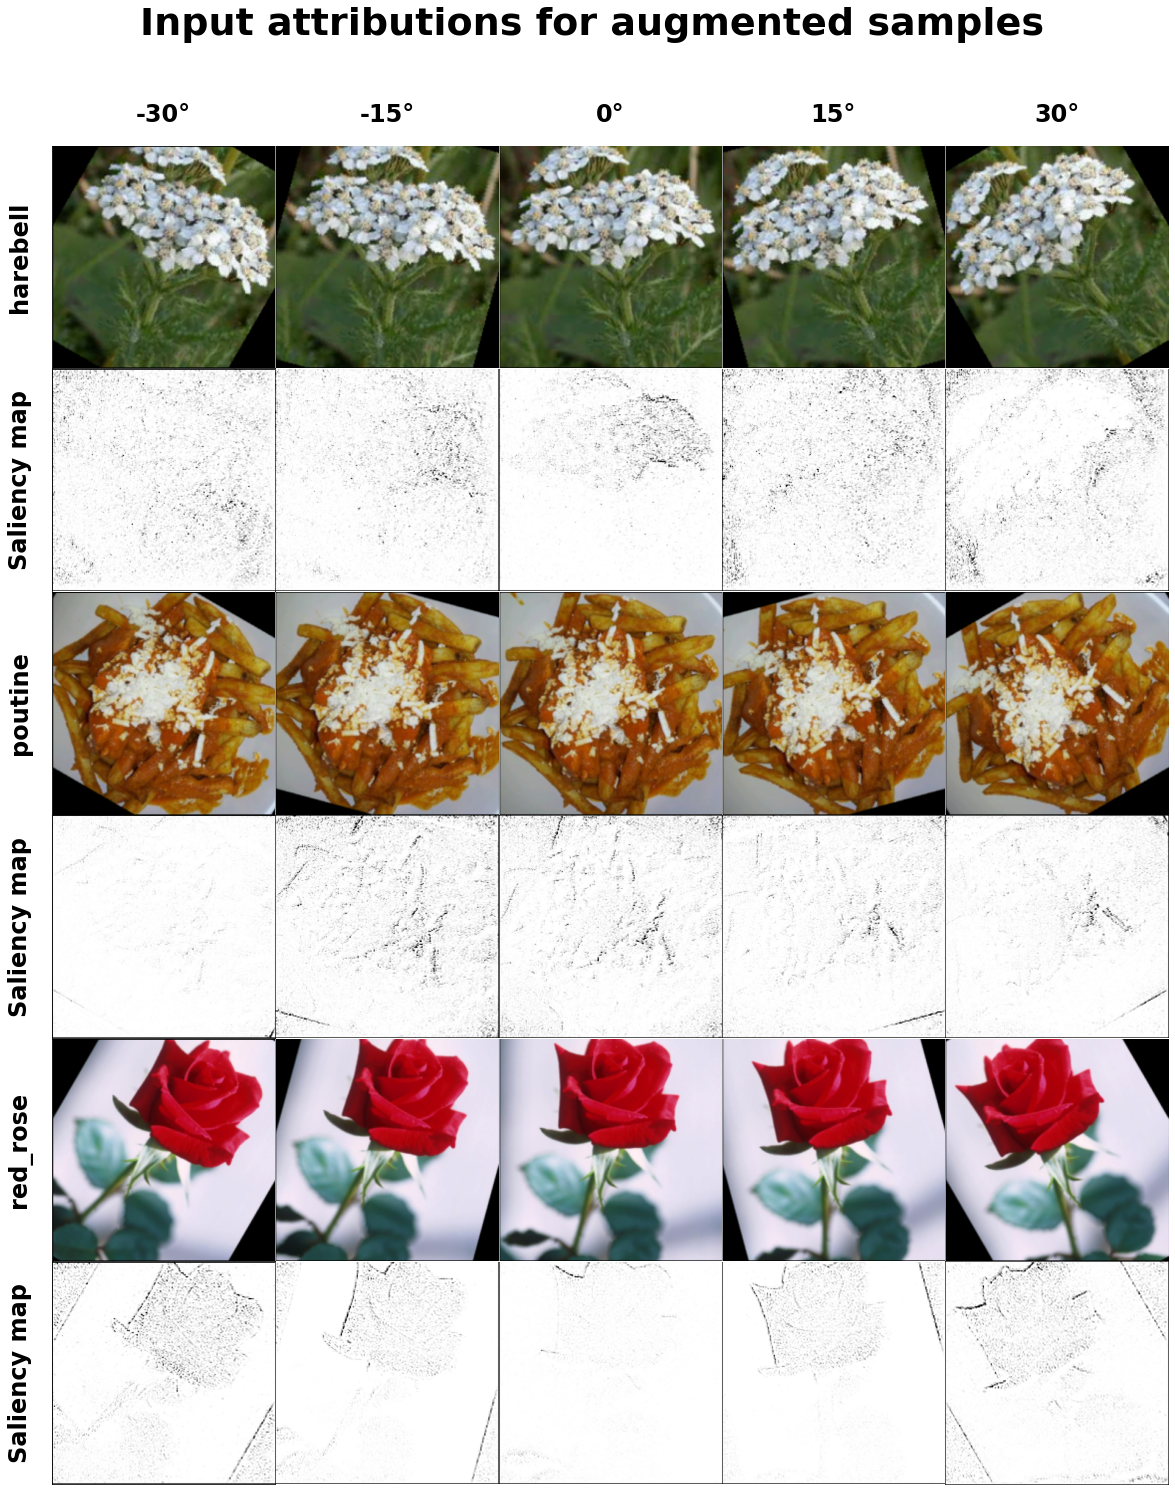

In [115]:
fig, axes = plt.subplots(
    nrows=max_rows*len(images), 
    ncols=rotation_max_cols, 
    figsize=(4*rotation_max_cols,4*max_rows*len(images))
)
for idx, image in enumerate(all_images):
    row = idx // rotation_max_cols
    col = idx % rotation_max_cols
    axes[row, col].axis("off")
    axes[row, col].imshow(image, cmap="gray")
    
    
for col in range(0, rotation_max_cols):
    axes[0, col].set_title(x_labels[col], fontsize=24, pad=24, fontweight='bold')
    
for idx, img_def in enumerate(images):
    axes[idx*2, 0].set_ylabel(img_def['title'], fontsize=24, fontweight='bold', labelpad=20)
    axes[idx*2, 0].axis('on')
    axes[idx*2, 0].set_yticks([])
    axes[idx*2+1, 0].set_ylabel('Saliency map', fontsize=24, fontweight='bold', labelpad=20)
    axes[idx*2+1, 0].axis('on')
    axes[idx*2+1, 0].set_yticks([])
    axes[idx*2+1, 0].set_xticks([])

# for ax in axes.flat:
#     ax.set_title('x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('equal')
fig.subplots_adjust(top=0.90)
fig.suptitle('Input attributions for augmented samples', fontsize=38,fontweight='bold')
plt.show()

In [116]:

fig.savefig(f'../../augmentation-results/rotation-sample.jpg', bbox_inches='tight')
fig.savefig(f'../../augmentation-results/rotation-sample.png', bbox_inches='tight')